Sabrina Araújo nUSP 12566182

Implementação e comparação de template matching

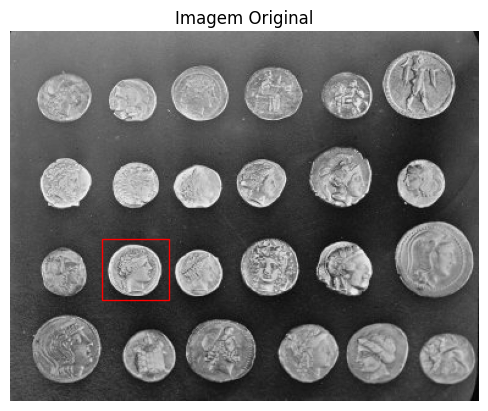

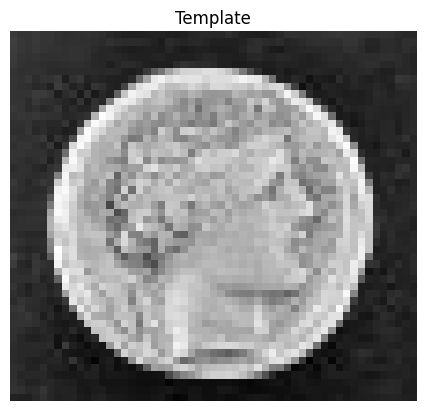

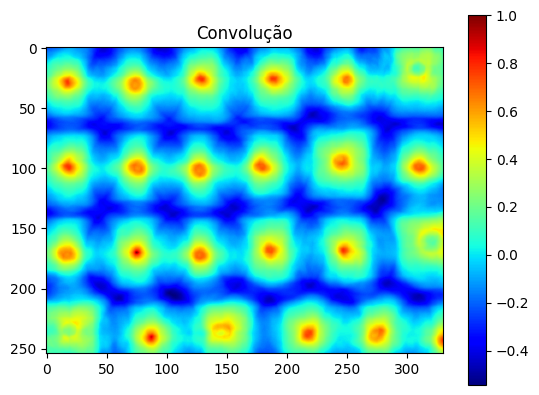

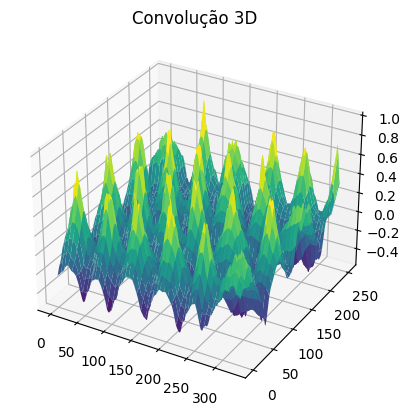

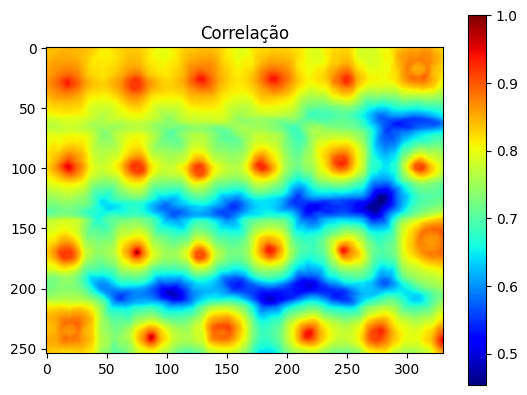

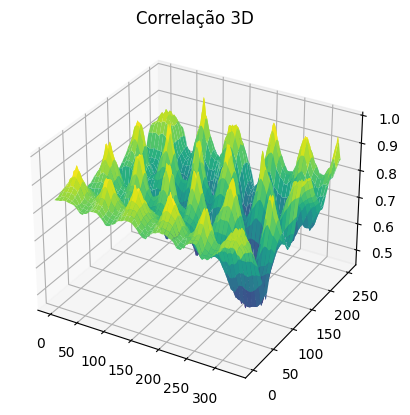

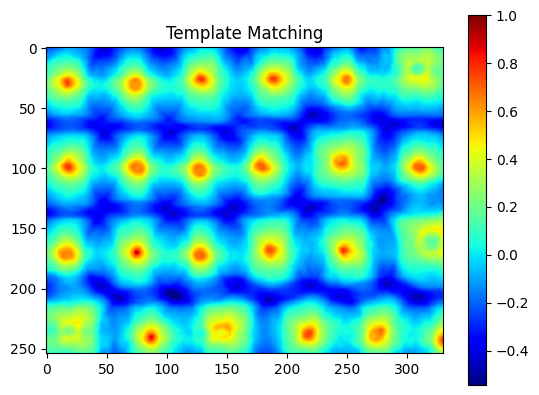

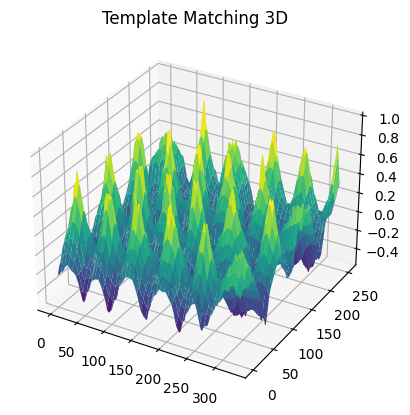

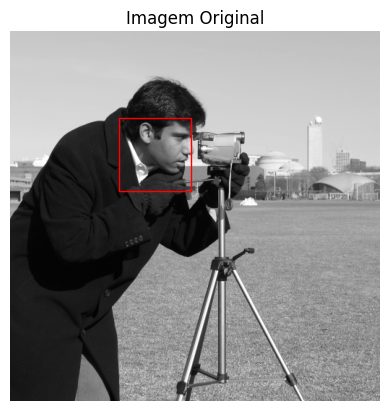

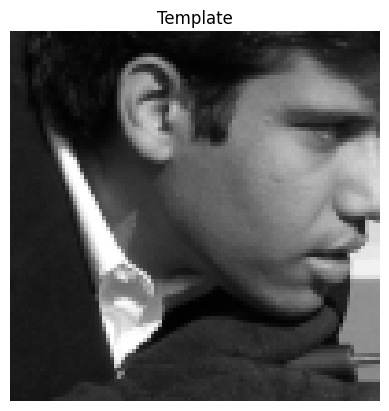

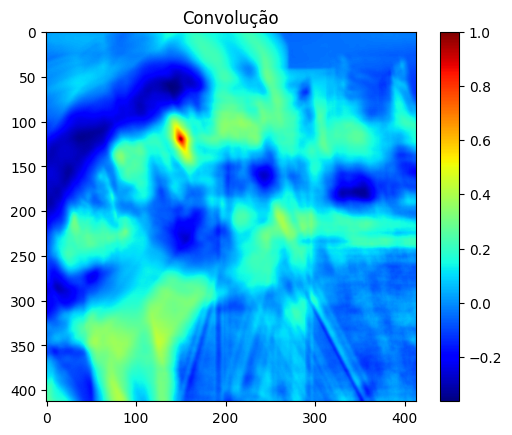

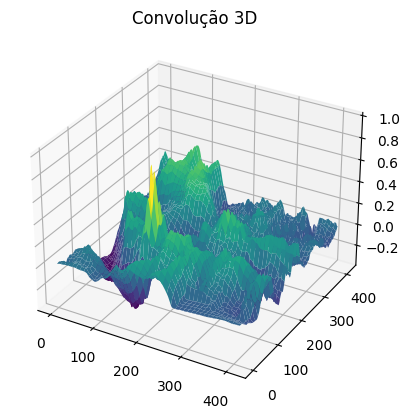

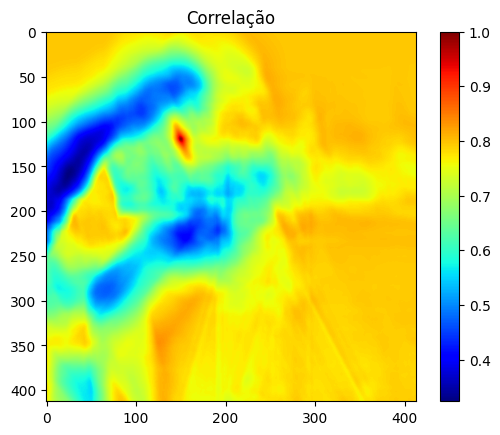

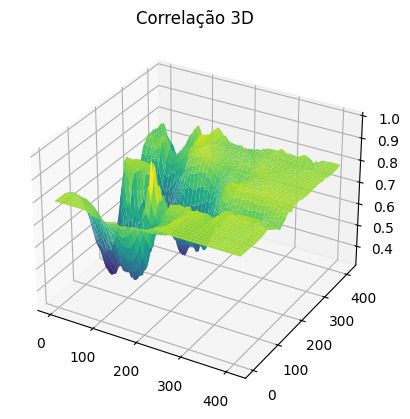

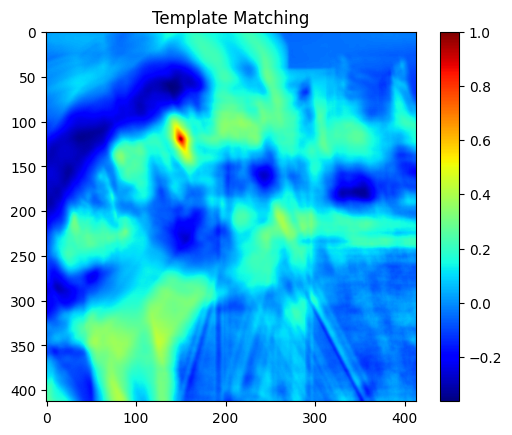

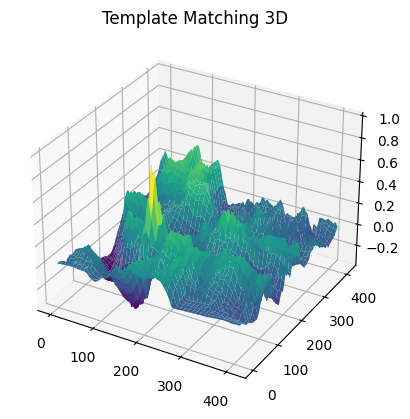

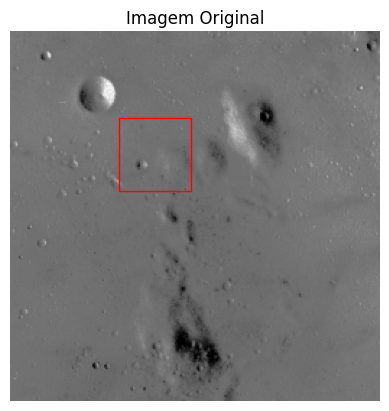

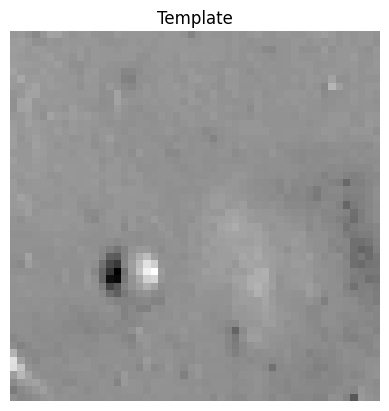

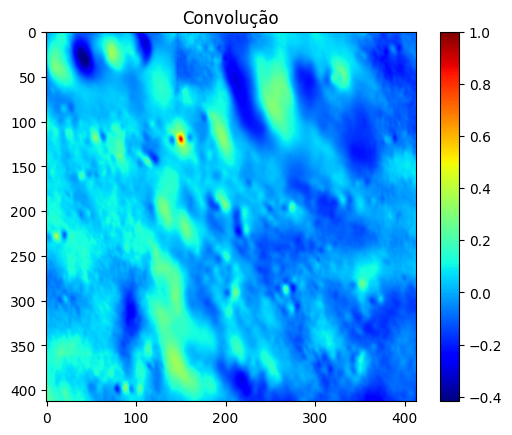

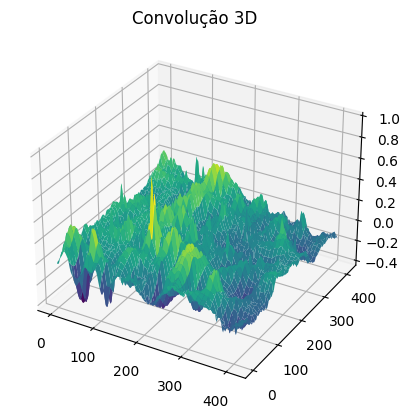

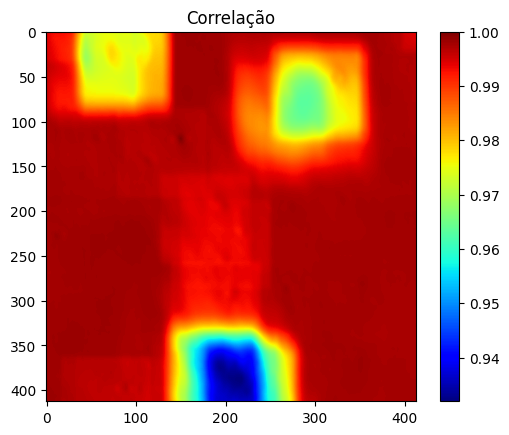

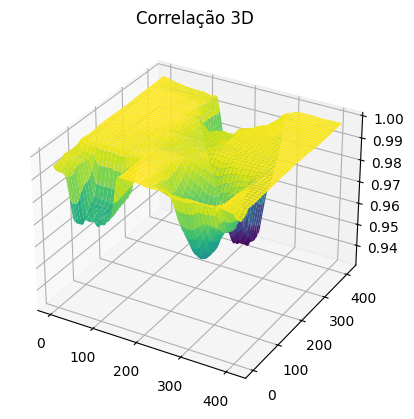

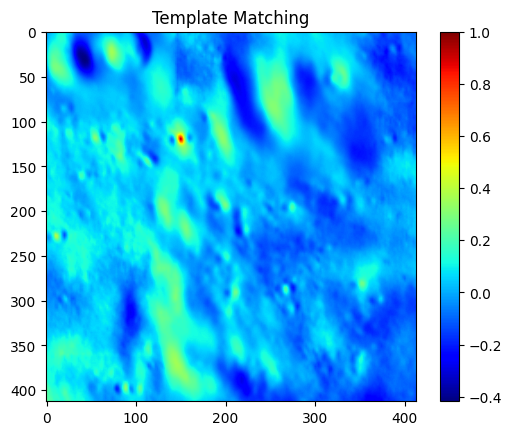

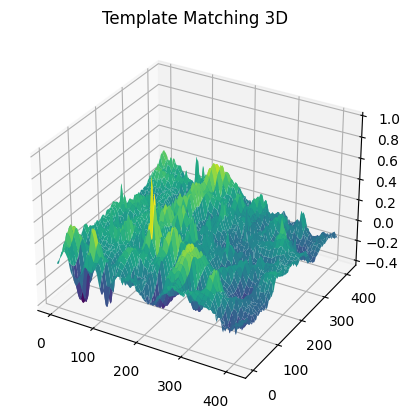

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.feature import match_template
import cv2

def convolucao(imagem, template):
    return cv2.matchTemplate(imagem, template, cv2.TM_CCOEFF_NORMED)

def correlacao(imagem, template):
    return cv2.matchTemplate(imagem, template, cv2.TM_CCORR_NORMED)

def templateMatching(imagem, template):
    return match_template(imagem, template)

def plot(imagem, descricao):
    plt.imshow(imagem, cmap='jet')
    plt.title(descricao)
    plt.colorbar()
    plt.show()

def plot_superficie(imagem, descricao):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    x, y = np.meshgrid(np.arange(imagem.shape[1]), np.arange(imagem.shape[0]))
    ax.plot_surface(x, y, imagem, cmap='viridis')
    plt.title(descricao)
    plt.show()

def experimento(imagem, x, y, w, h):
    template = imagem[y:y+h, x:x+w]

    imagem_convolucao = convolucao(imagem, template)
    imagem_correlacao = correlacao(imagem, template)
    imagem_templateMatching = templateMatching(imagem, template)

    plt.imshow(imagem, cmap='gray')
    plt.title('Imagem Original')
    plt.axis('off')
    plt.gca().add_patch(plt.Rectangle((x, y), w, h, color='r', fill=False))
    plt.show()

    plt.imshow(template, cmap='gray')
    plt.title('Template')
    plt.axis('off')
    plt.show()

    plot(imagem_convolucao, 'Convolução')
    plot_superficie(imagem_convolucao, 'Convolução 3D')
    plot(imagem_correlacao, 'Correlação')
    plot_superficie(imagem_correlacao, 'Correlação 3D')
    plot(imagem_templateMatching, 'Template Matching')
    plot_superficie(imagem_templateMatching, 'Template Matching 3D')

moedas = data.coins()
experimento(moedas, 75, 170, 55, 50)

camera = data.camera()
experimento(camera, 150, 120, 100, 100)

lua = data.moon()
experimento(lua, 150, 120, 100, 100)
